In [1]:
#Projeto Clusterização para Forense Computacional
#Disciplina de Processamento de Linguagem Natural - Prof. Dra. Nádia

#Importação das API's
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
import os
import re
import timeit
import nltk
%matplotlib inline
start = timeit.default_timer()

In [3]:
#Carregamento dos arquivos a serem processados

path="D:/Projeto/pdftotxt"
data = {}
i=0
for subdir, dirs, files in os.walk(path):
    for file in files:
        file_path = subdir + os.path.sep + file
        arquivo = open(file_path, 'r',encoding='utf8', errors='ignore')
        text = arquivo.read()
        lowers = text.lower()
        data[i] = lowers
        i=i+1

#Verificar se todos os arquivos foram carregados
print(len(data))
print(data[0])

541
table dp-1. profile of general demographic characteristics: 2000
geographic area: tenino city, washington

[for information on confidentiality protection, nonsampling error, and definitions, see text]

subject                                                                               number percent             subject                                                             number percent

    total population. . . . . . . . . . . . . . . . . . . . . . . . . .               1,447    100.0 hispanic or latino and race

sex and age                                                                             691           total population. . . . . . . . . . . . . . . . . . . . . . . . . .            1,447    100.0
male . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .    756                                                                                              55      3.8
female. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [4]:
#Usando expressão regular para remover o que não for letras e transformar tudo em texto minúsculo
i=0
u=len(data)
for i in range(0,len(data)):
    letters_only = re.sub("[^a-zA-Z]", # The pattern to search for
      " ", # The pattern to replace it with
      data[i] ) # The text to search
    lower_case = letters_only.lower()
    re.sub(r'\b\w{1,3}\b', '',lower_case)
    data[i]=lower_case
print(data[0])

table dp    profile of general demographic characteristics       geographic area  tenino city  washington   for information on confidentiality protection  nonsampling error  and definitions  see text   subject                                                                               number percent             subject                                                             number percent      total population                                                                                 hispanic or latino and race  sex and age                                                                                           total population                                                                              male                                                                                                                                                                                                 female                                                                        

In [5]:
#Stopword and punctuation
stopwords = nltk.corpus.stopwords.words('english') + list(string.punctuation)

In [6]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [7]:
# define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [8]:
#use extend so it's a big flat list of vocab
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in data.values():
    allwords_stemmed = tokenize_and_stem(i) 
    totalvocab_stemmed.extend(allwords_stemmed)    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)
print("finalizou")

finalizou


In [9]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 3654055 items in vocab_frame


In [10]:
print(vocab_frame.head())

           words
tabl       table
dp            dp
profil   profile
of            of
general  general


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(data.values()) #fit the vectorizer to files

print(tfidf_matrix.shape)

c:\users\albernaz\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Wall time: 1min 59s
(541, 713)


In [12]:
terms = tfidf_vectorizer.get_feature_names()

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

In [14]:
from sklearn.cluster import KMeans

num_clusters = 8

km = KMeans(n_clusters=num_clusters,n_init = 20, n_jobs = 1)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

Wall time: 49.6 s


In [15]:
from sklearn.externals import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

joblib.dump(km,  'doc_cluster.pkl')

km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

In [16]:
result = { 'termo': data.values(), 'cluster': clusters }

frame = pd.DataFrame(result, index = [clusters] , columns = ['termo', 'cluster'])

In [17]:
frame['cluster'].value_counts()

2    143
5     85
4     75
0     75
3     58
7     48
6     39
1     18
Name: cluster, dtype: int64

Iniciando 1
Finalizando 1
Iniciando 2
Finalizando 2
Iniciando 3
Finalizando 3
Iniciando 4
Finalizando 4
Iniciando 5
Finalizando 5
Iniciando 6
Finalizando 6
Iniciando 7
Finalizando 7
Iniciando 8
Finalizando 8
Iniciando 9
Finalizando 9
Iniciando 10
Finalizando 10


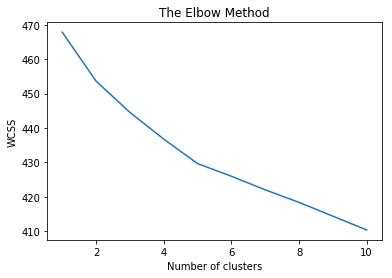

In [18]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    print("Iniciando", i)
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)
    print("Finalizando", i)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [19]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:,-1:-26:-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :10]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace
    
    #print("Cluster %d titles:" % i, end='')
    #for termo in frame.ix[i]['termo'].values.tolist():
    #    print(' %s,' % termo, end='')
    #print() #add whitespace
    #print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: b'requirements', b'applicable', b'section', b'code', b'notice', b'information', b'file', b'board', b'amendment', b'any',

Cluster 1 words: b'plants', b'use', b'north', b'cover', b'area', b'located', b'park', b'site', b'leaves', b'water',

Cluster 2 words: b'years', b'establishment', b'st', b'national', b'city', b'service', b'states', b'total', b'department', b'park',

Cluster 3 words: b'e', b'd', b'c', b'b', b'l', b'j', b'm', b't', b'p', b'n',

Cluster 4 words: b'figure', b'm', b'use', b'measured', b'data', b'water', b'al', b'model', b'et', b'et',

Cluster 5 words: b'medical', b'health', b'use', b'program', b'states', b'careful', b'provide', b'report', b'service', b'years',

Cluster 6 words: b'v', b'd', b'claim', b'f', b'states', b'u', b'units', b'u', b'district', b'c',

Cluster 7 words: b'water', b'river', b'site', b'area', b'use', b'county', b'sample', b'surface', b'flows', b'plants',





In [20]:
stop = timeit.default_timer()
execution_time = stop - start

print(execution_time/60) #It returns time in min

14.596097984316666
